# TRAFFIC SIGNS CLASSIFICATION USING LE-NET ARCHITECTURE IN KERAS

# PROBLEM STATEMENT
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

In [1]:
# Import Dataset & Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings("ignore")

In [4]:
cd Downloads

/Users/yeji-park/Downloads


In [5]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [9]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [10]:
y_train.shape

(34799,)

1

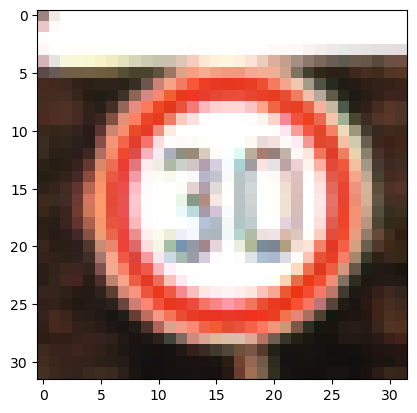

In [17]:
# Image Exploration
i = 3000
plt.imshow(X_train[i])
y_train[i]

Data Pre-Processing
1. Convert Colored Scale Image to Gray Scale Image
2. Data Normalization: Pixel value 0 -255 into -1 to 1
3. Shuffling: to make sure data is shuffled and not in order for better training 

In [18]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [22]:
# Color to Gray scale by summing up all the pixels and divide by 3 (RGB) [Just getting the average]

X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [24]:
# Normalization 

X_train_gray_norm = (X_train_gray - 128)/ 128
X_test_gray_norm = (X_test_gray - 128)/ 128
X_validation_gray_norm = (X_validation_gray - 128)/ 128

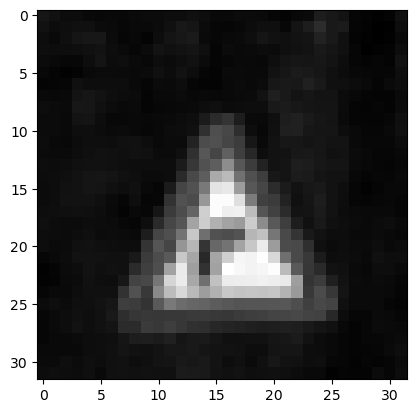

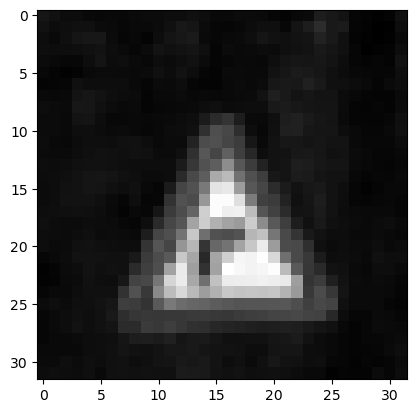

In [34]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output (Downsampling)
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.


- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16


- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400


- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output


- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output


- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [35]:
# Modeling 

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [36]:
cnn_model = Sequential() 

# First Convolutional layer
cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation = 'relu', input_shape = (32,32,1)))# Downsampling first layetr
# Downsampling first layer
cnn_model.add(AveragePooling2D())

# Second Convolutional layer
cnn_model.add(Conv2D(filters = 16, kernel_size=(5,5), activation = 'relu'))
# Downsampling second layer
cnn_model.add(AveragePooling2D())

# Flattening 
cnn_model.add(Flatten())

# Fully Connected Layer
cnn_model.add(Dense(units = 120, activation = 'relu'))

# Second Fully Connected Layer
cnn_model.add(Dense(units = 84, activation = 'relu'))

# Last Fully Connected Layer
cnn_model.add(Dense(units = 43, activation = 'softmax'))


In [37]:
# Compiling the model
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])


In [43]:
# Train the model
history = cnn_model.fit(X_train_gray_norm, 
              y_train,
             batch_size = 500,
             epochs = 50,
             verbose = 1,
             validation_data = (X_validation_gray_norm, y_validation))


Epoch 1/50
70/70 [==============================] - 3s 50ms/step - loss: 0.0619 - accuracy: 0.9842 - val_loss: 0.8417 - val_accuracy: 0.8299
Epoch 2/50
70/70 [==============================] - 5s 74ms/step - loss: 0.0550 - accuracy: 0.9857 - val_loss: 0.9008 - val_accuracy: 0.8297
Epoch 3/50
70/70 [==============================] - 5s 72ms/step - loss: 0.0526 - accuracy: 0.9867 - val_loss: 0.8903 - val_accuracy: 0.8249
Epoch 4/50
70/70 [==============================] - 5s 73ms/step - loss: 0.0537 - accuracy: 0.9858 - val_loss: 0.8920 - val_accuracy: 0.8290
Epoch 5/50
70/70 [==============================] - 5s 71ms/step - loss: 0.0523 - accuracy: 0.9865 - val_loss: 0.8676 - val_accuracy: 0.8381
Epoch 6/50
70/70 [==============================] - 5s 70ms/step - loss: 0.0518 - accuracy: 0.9863 - val_loss: 0.9500 - val_accuracy: 0.8249
Epoch 7/50
70/70 [==============================] - 5s 72ms/step - loss: 0.0443 - accuracy: 0.9884 - val_loss: 0.8580 - val_accuracy: 0.8342
Epoch 8/50
70

Model Evaluation 

In [45]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.7597 - accuracy: 0.8616
Test Accuracy: 0.8615993857383728


In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

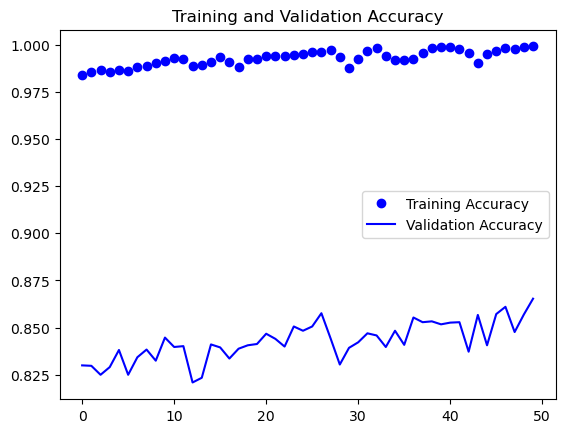

In [54]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

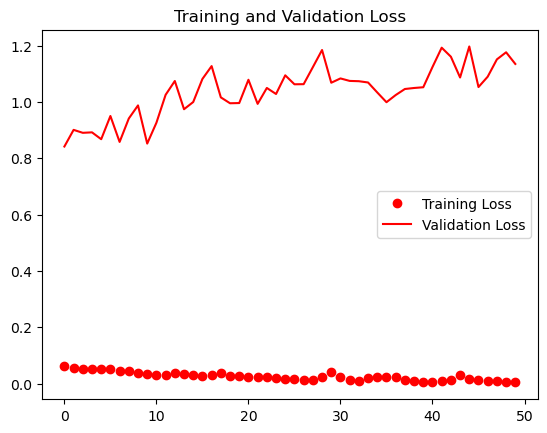

In [56]:

plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

395/395 [==============================] - 1s 2ms/step


<Axes: >

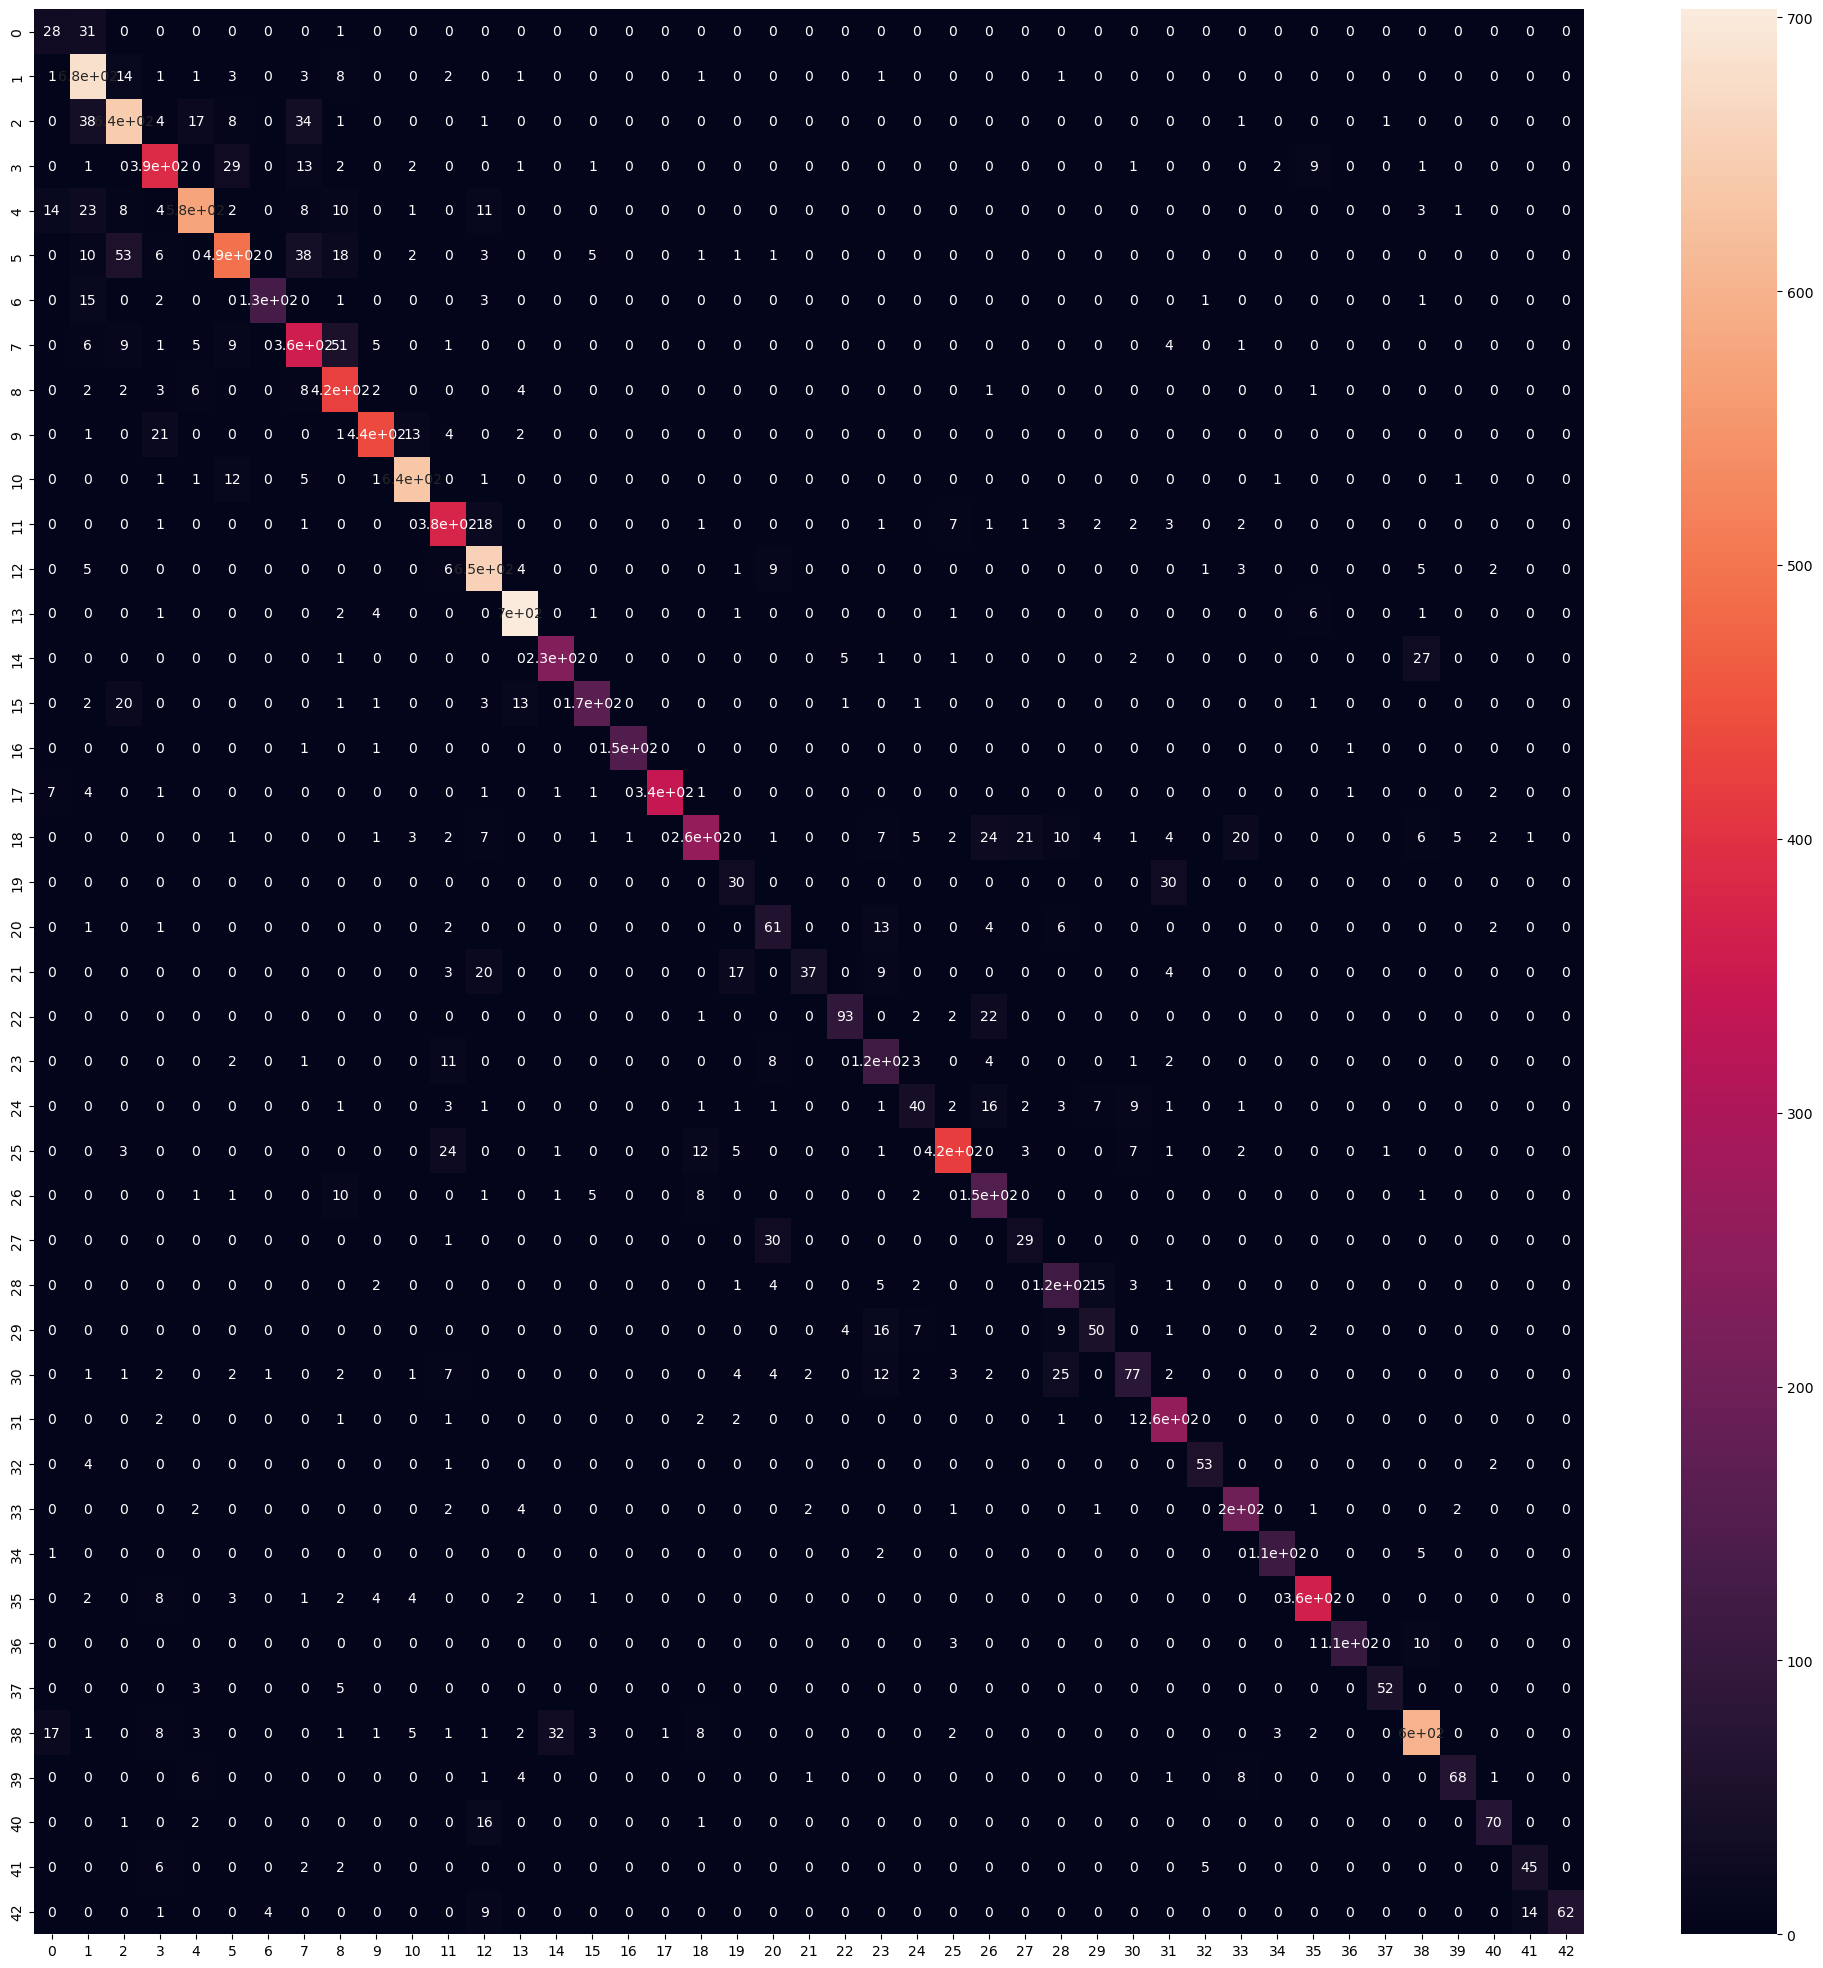

In [74]:
# Predictions
predictions = cnn_model.predict(X_test_gray_norm)

# Obtain predicted class labels from predictions
y_pred = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True)


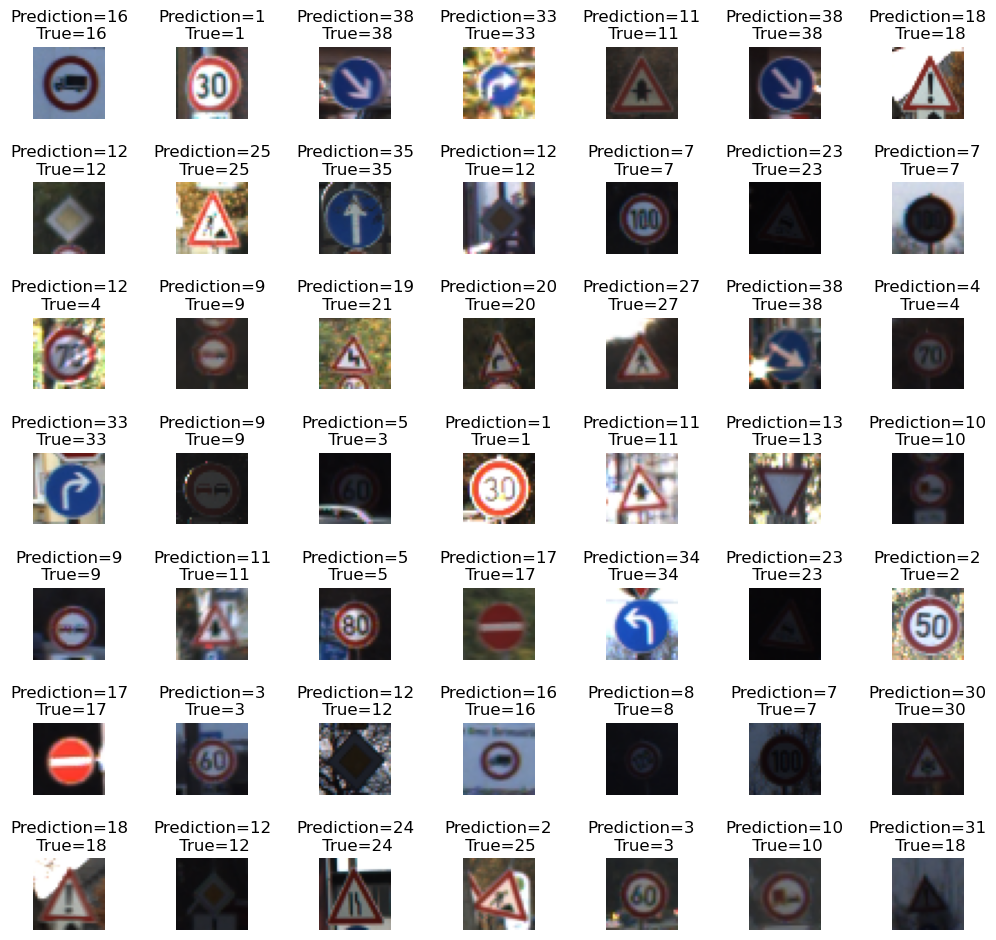

In [83]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(y_pred[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [88]:
from sklearn.metrics import classification_report

num_classes = 43
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.41      0.47      0.44        60
     Class 1       0.82      0.95      0.88       720
     Class 2       0.85      0.86      0.86       750
     Class 3       0.84      0.86      0.85       450
     Class 4       0.92      0.87      0.90       660
     Class 5       0.87      0.78      0.82       630
     Class 6       0.96      0.85      0.90       150
     Class 7       0.76      0.80      0.78       450
     Class 8       0.78      0.94      0.85       450
     Class 9       0.95      0.91      0.93       480
    Class 10       0.95      0.97      0.96       660
    Class 11       0.84      0.90      0.87       420
    Class 12       0.87      0.95      0.91       690
    Class 13       0.95      0.98      0.96       720
    Class 14       0.87      0.86      0.87       270
    Class 15       0.90      0.80      0.85       210
    Class 16       0.99      0.98      0.99       150
    Class 17       1.00    

In [86]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the accuracy for each class
accuracies = []
for i in range(num_classes):
    true_positive = cm[i, i]
    total = np.sum(cm[i, :])
    accuracy = true_positive / total
    accuracies.append(accuracy)

print("Accuracy for each class:")
for i, accuracy in enumerate(accuracies):
    print(f"Class {i}: {accuracy}")


Accuracy for each class:
Class 0: 0.4666666666666667
Class 1: 0.9486111111111111
Class 2: 0.86
Class 3: 0.8622222222222222
Class 4: 0.8712121212121212
Class 5: 0.780952380952381
Class 6: 0.8466666666666667
Class 7: 0.7955555555555556
Class 8: 0.9355555555555556
Class 9: 0.9125
Class 10: 0.9651515151515152
Class 11: 0.8976190476190476
Class 12: 0.9478260869565217
Class 13: 0.9763888888888889
Class 14: 0.8629629629629629
Class 15: 0.7952380952380952
Class 16: 0.98
Class 17: 0.9472222222222222
Class 18: 0.6692307692307692
Class 19: 0.5
Class 20: 0.6777777777777778
Class 21: 0.4111111111111111
Class 22: 0.775
Class 23: 0.7866666666666666
Class 24: 0.4444444444444444
Class 25: 0.875
Class 26: 0.8333333333333334
Class 27: 0.48333333333333334
Class 28: 0.78
Class 29: 0.5555555555555556
Class 30: 0.5133333333333333
Class 31: 0.9629629629629629
Class 32: 0.8833333333333333
Class 33: 0.9285714285714286
Class 34: 0.9333333333333333
Class 35: 0.9307692307692308
Class 36: 0.8833333333333333
Class 3

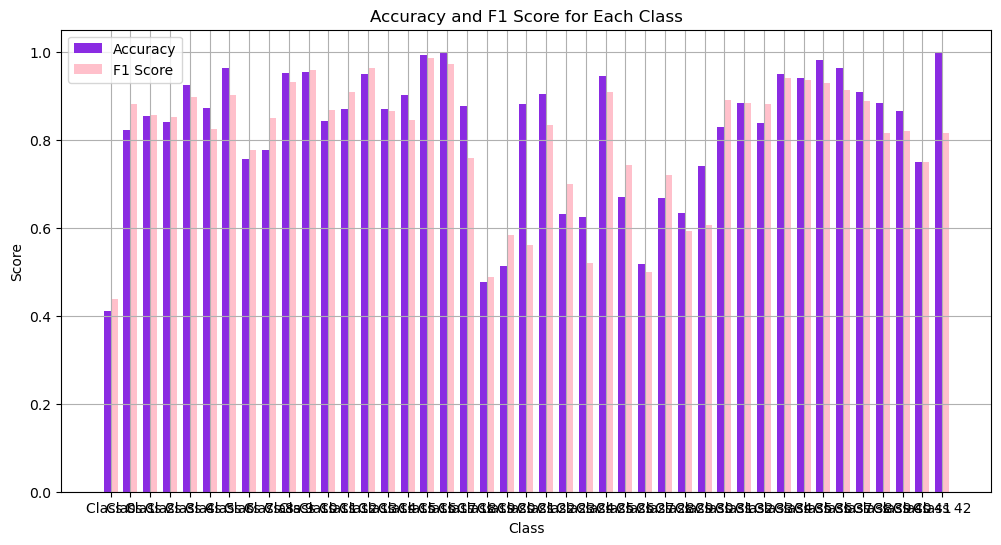

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

# Extract accuracies and F1 scores for each class
accuracies = [report[name]['precision'] for name in target_names]
f1_scores = [report[name]['f1-score'] for name in target_names]

# Plot the accuracy and F1 score for each class
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(num_classes)

violet_color = '#8A2BE2'
pink_color = '#FFC0CB'

plt.bar(index, accuracies, bar_width, label='Accuracy', color=violet_color)
plt.bar(index + bar_width, f1_scores, bar_width, label='F1 Score', color=pink_color)

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Accuracy and F1 Score for Each Class')
plt.xticks(index + bar_width / 2, [f'Class {i}' for i in range(num_classes)])
plt.legend()
plt.grid(True)
plt.show()
